In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')

# I. Xử lý dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df. isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.shape

(41188, 21)

# II. Khám phá dữ liệu

In [ ]:
!apt-get install -y fonts-dejavu-core fonts-dejavu-extra
!apt-get install -y fontconfig
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# Kiểm tra font nào có sẵn
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Arial' in font:
        print(font)
# Thêm đường dẫn tới font Arial vào matplotlib
arial_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'
fm.fontManager.addfont(arial_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 3,082 kB of archives.
After this operation, 10.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-extra all 2.37-2build1 [2,041 kB]
Fetched 3,082 kB in 11s (270 kB/s)
Selecting previously unselected package fonts-dejavu-core.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-dejavu-core_2.37-2build1_all.deb ...
Unpacking fonts-dejavu-core (2.37-2build1) ...
Selecting previously unselected package fonts-dejavu-extra.
Preparing to unpack .../fonts-dejavu-extra_2.37-2build1_all.deb ...
Unpacking fonts-dejavu-extra (2.37-2b

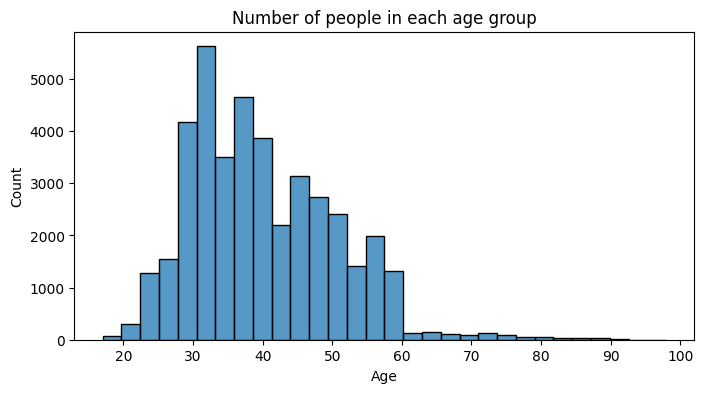

In [ ]:
# kiểm tra sự phân bổ của mọi người theo độ tuổi
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=False)
plt.title('Number of people in each age group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Khách hàng chính của ngân hàng chủ yếu tập trung từ khoảng 20 - 60 tuổi. Nhiều nhất là từ 30 tuổi trở lên.

<ipython-input-6-dca05311b3c4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='contact', data=df, palette='Set2')
<ipython-input-6-dca05311b3c4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, palette='Set3')
<ipython-input-6-dca05311b3c4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, palette='Set1')
<ipython-input-6-dca05311b3c4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

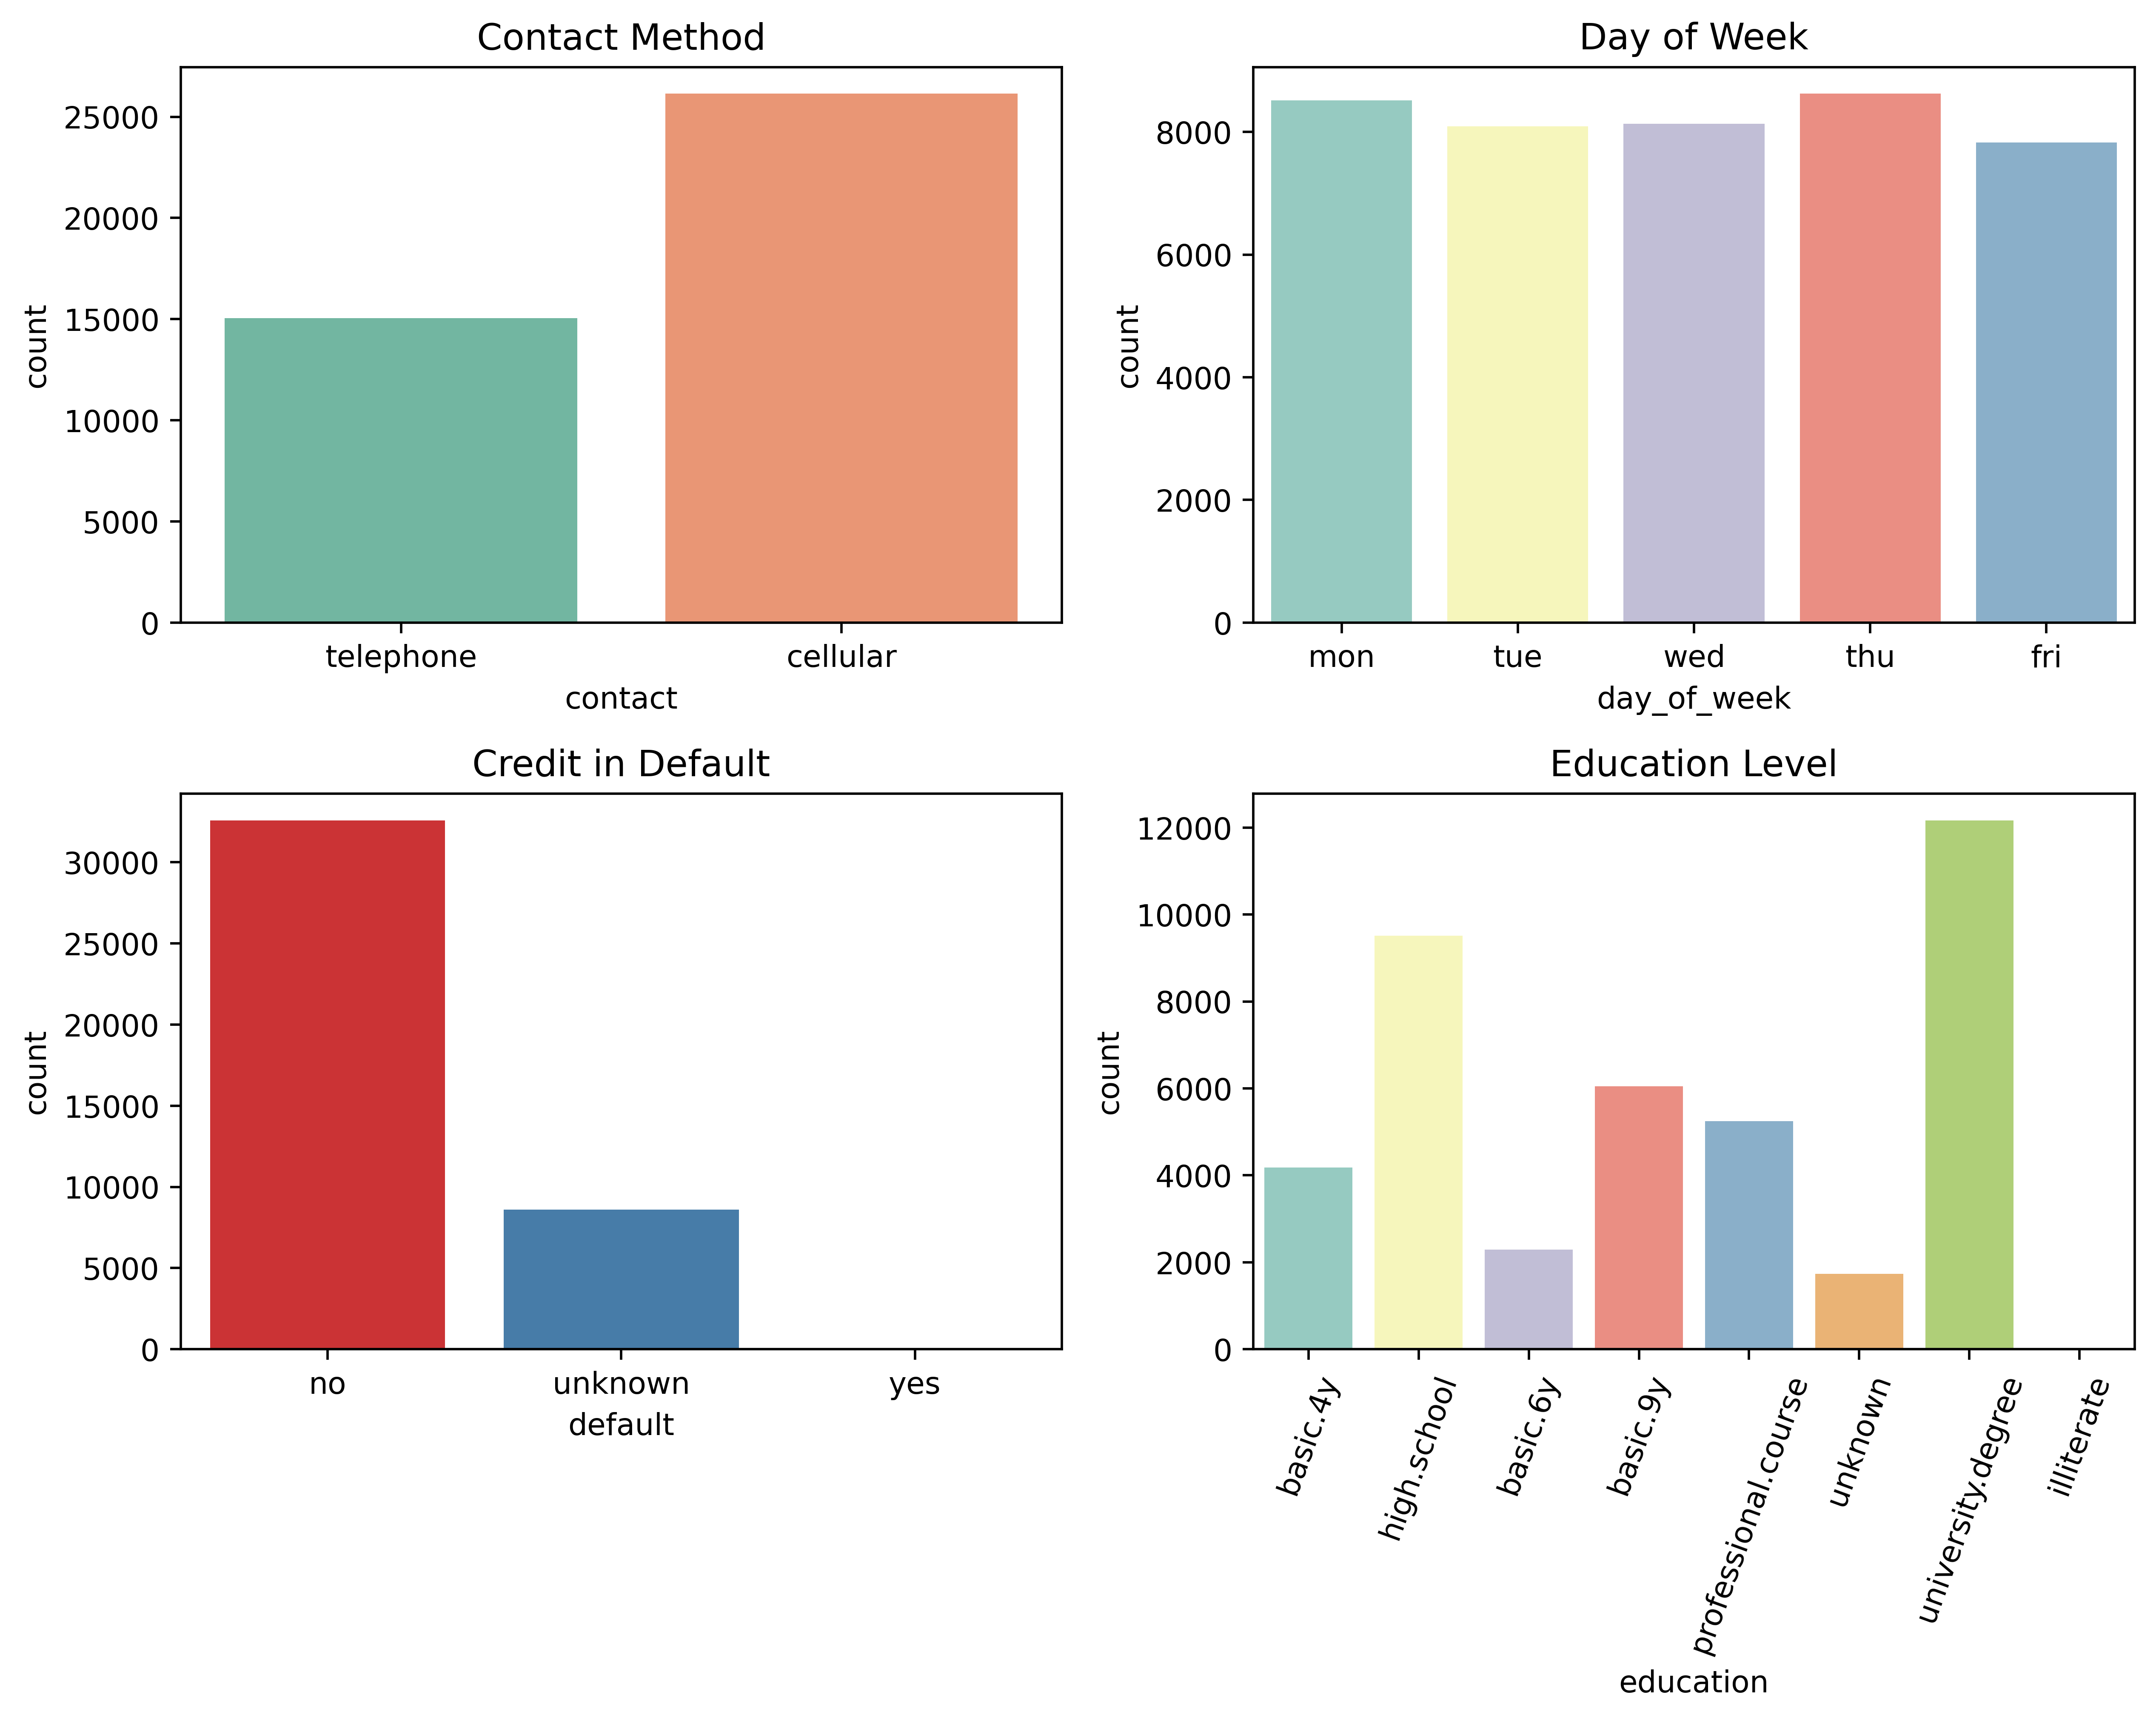

In [ ]:
#Kiểm tra các giá trị duy nhất trong biến

plt.figure(figsize=(10, 8), dpi=512)
# contact
plt.subplot(221)
sns.countplot(x='contact', data=df, palette='Set2')
plt.title("Contact Method")
# day_of_week
plt.subplot(222)
sns.countplot(x='day_of_week', data=df, palette='Set3')
plt.title("Day of Week")
# default
plt.subplot(223)
sns.countplot(x='default', data=df, palette='Set1')
plt.title("Credit in Default")
# education
plt.subplot(224)
sns.countplot(x='education', data=df, palette='Set3')
plt.xticks(rotation=70)
plt.title("Education Level")
plt.tight_layout()
plt.show()

*   **Cellular**: Phương thức liên lạc qua điện thoại di động phổ biến hơn có thể do sự tiện lợi và linh hoạt so với điện thoại cố định.
*  **Thời gian liên lạc**: Số lượng liên lạc trải đều trong các ngày làm việc, với đỉnh cao vào thứ năm. Điều này có thể liên quan đến chiến lược của chiến dịch tiếp thị.
*   **Tình trạng tín dụng**: Phần lớn khách hàng không có vấn đề tín dụng, điều này có thể tích cực cho các chiến dịch tiếp thị.
*   **Trình độ học vấn**: Sự phân bố đa dạng trong trình độ học vấn có thể ảnh hưởng đến cách tiếp cận và thông điệp của chiến dịch tiếp thị.

<ipython-input-64-a641353e5c03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='housing', data=df,palette='Set2')
<ipython-input-64-a641353e5c03>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=df,palette='Set3')
<ipython-input-64-a641353e5c03>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan', data=df,palette='Set1')
<ipython-input-64-a641353e5c03>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

([0, 1, 2, 3],
 [Text(0, 0, 'married'),
  Text(1, 0, 'single'),
  Text(2, 0, 'divorced'),
  Text(3, 0, 'unknown')])

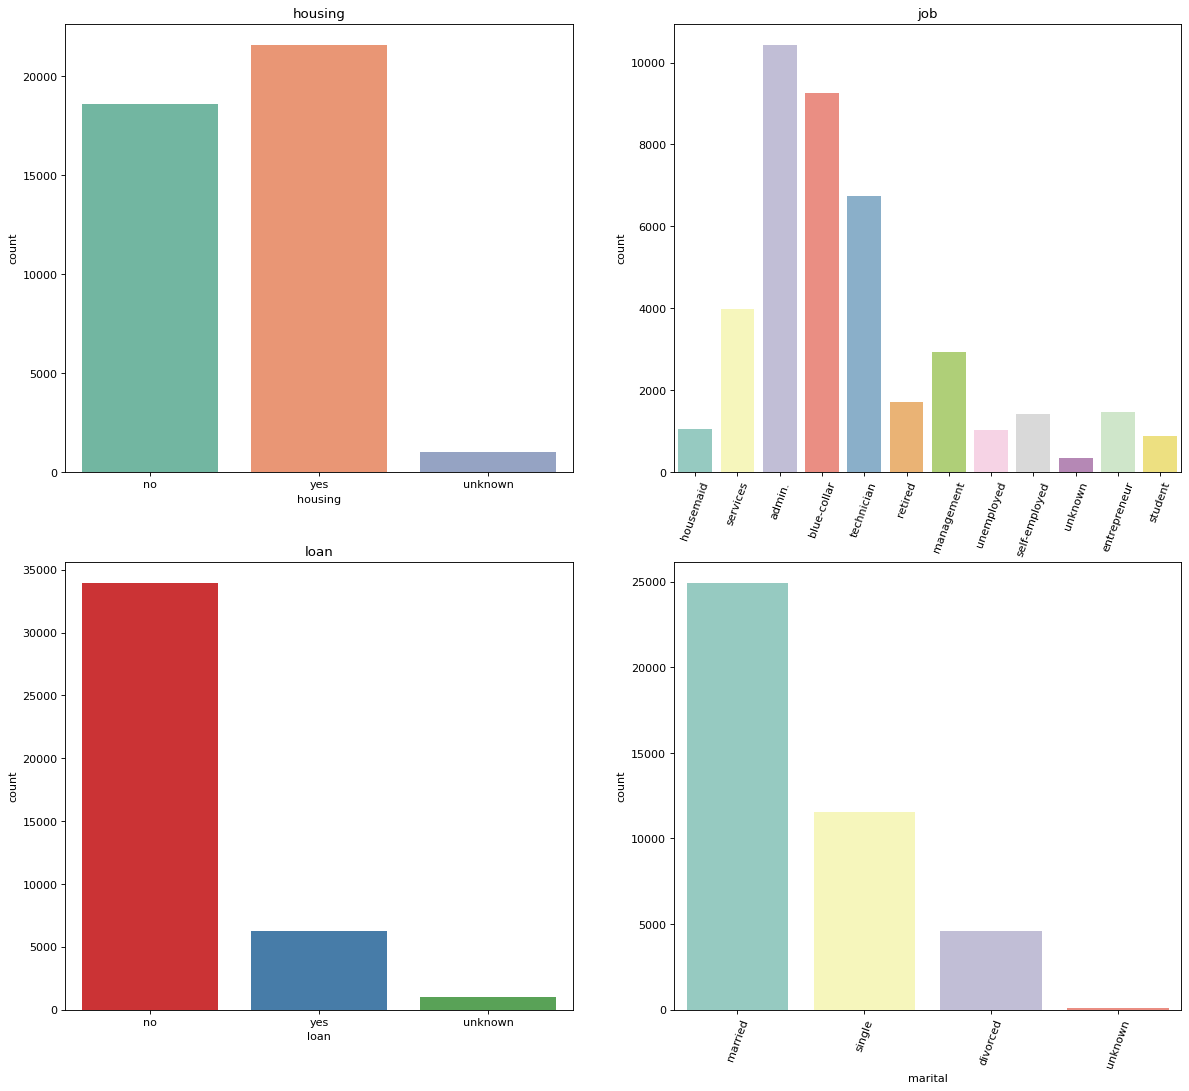

In [64]:
plt.figure(figsize=(18, 16), dpi=80)
plt.subplot(221)
sns.countplot(x='housing', data=df,palette='Set2')
plt.title("housing")

plt.subplot(222)
sns.countplot(x='job', data=df,palette='Set3')
plt.xticks(rotation=70)
plt.title("job")

plt.subplot(223)
sns.countplot(x='loan', data=df,palette='Set1')
plt.title("loan")

plt.subplot(224)
sns.countplot(x='marital', data=df,palette='Set3')
plt.xticks(rotation=70)

*   **Tình trạng nhà ở**: Phần lớn khách hàng có nhà ở, điều này có thể liên quan đến khả năng tài chính và ổn định của họ.
*   **Nghề nghiệp**: Sự đa dạng về nghề nghiệp, với các nhóm nghề nghiệp phổ biến như "blue-collar", "management", và "technician". Điều này có thể cung cấp thông tin về đối tượng khách hàng chính của chiến dịch tiếp thị.
*   **Khoản vay**: Phần lớn khách hàng không có khoản vay, điều này có thể ảnh hưởng đến khả năng chi tiêu và đầu tư của họ.
*   **Tình trạng hôn nhân**: Phần lớn khách hàng đã kết hôn, điều này có thể ảnh hưởng đến quyết định tài chính và sự ổn định tài chính của họ.

<ipython-input-8-643fc0b7e844>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df,palette='Set2')
<ipython-input-8-643fc0b7e844>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='poutcome', data=df,palette='Set3')


Text(0.5, 1.0, 'poutcome')

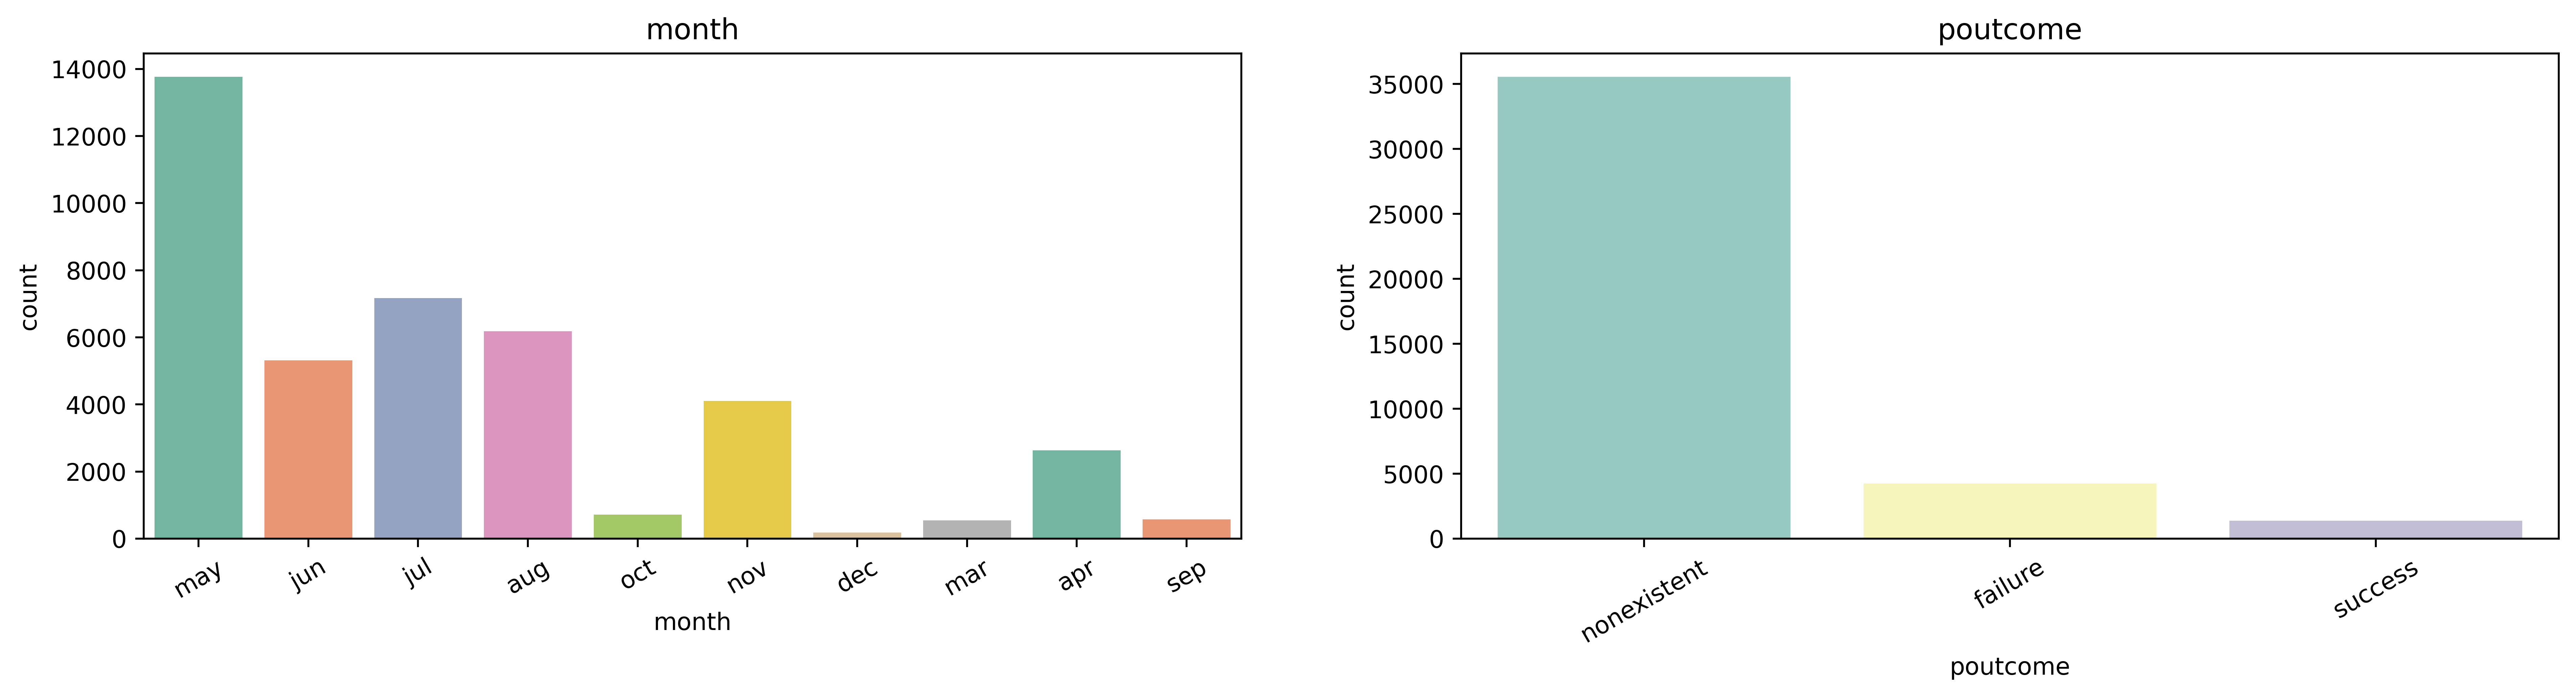

In [ ]:
plt.figure(figsize=(18, 8), dpi=512)
plt.subplot(221)
sns.countplot(x='month', data=df,palette='Set2')
plt.xticks(rotation=30)
plt.title("month")

plt.subplot(222)
sns.countplot(x='poutcome', data=df,palette='Set3')
plt.xticks(rotation=30)
plt.title("poutcome")

*   **Tháng 5**: Tháng này có số lượng liên lạc cao nhất, điều này có thể gợi ý rằng chiến dịch tiếp thị chính được thực hiện vào tháng này. Ngân hàng có thể đã tập trung nhiều nguồn lực vào tháng này để tối đa hóa số lượng liên lạc.
*   **Các tháng khác**: Các tháng khác có sự phân bố liên lạc thấp hơn, có thể là do chiến dịch tiếp thị phụ hoặc do tần suất liên lạc giảm.
*   **Kết quả của chiến dịch trước**: Phần lớn khách hàng không có kết quả từ chiến dịch trước đó, có thể là do họ chưa từng được liên lạc trước đó hoặc thông tin không được ghi nhận. Một số nhỏ đã thất bại hoặc thành công, điều này có thể ảnh hưởng đến chiến lược tiếp thị hiện tại.



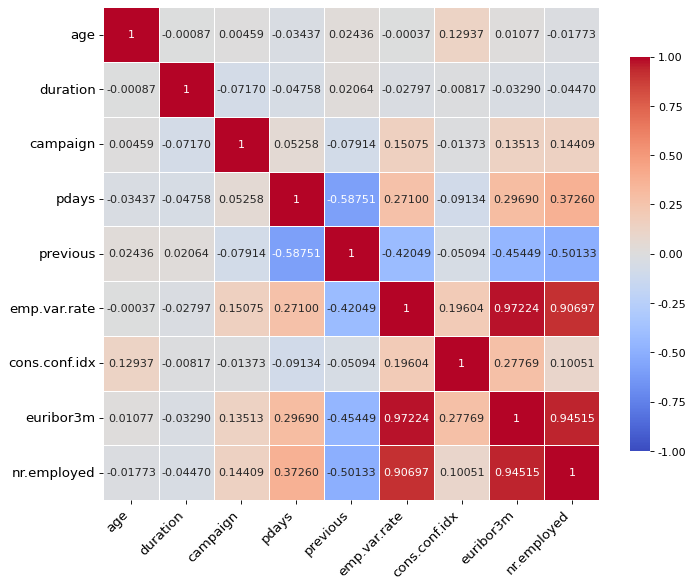

In [ ]:
# Kiểm tra mối tương quan giữa các biến
df_numeric = df.copy()
selected_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df_selected = df[selected_columns]
corr = df_selected.corr()
def custom_format(x):
    if np.isclose(x, 1.0):
        return "1"
    else:
        return f"{x:.5f}"
plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.5f', annot_kws={"size": 10}, linewidths=0.5, cbar_kws={'shrink': .8}, vmin=-1, vmax=1)
for text in plt.gca().texts:
    text.set_text(custom_format(float(text.get_text())))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

1.   Mối tương quan mạnh giữa **emp.var.rate**, **euribor3m** và **nr.employed**: Điều này có thể cho thấy rằng những biến số này liên quan đến các yếu tố kinh tế vĩ mô và có thể ảnh hưởng lớn đến nhau.
2.   Mối tương quan giữa **pdays** và **previous**: Điều này cho thấy rằng số ngày kể từ lần liên lạc cuối cùng có thể liên quan đến số lần liên lạc trước đó, có thể vì những khách hàng đã được liên lạc nhiều lần có thể được liên hệ lại sau một thời gian ngắn.



**Rút ra từ quá trình EDA**
* Contact Method: Liên lạc qua điện thoại di động phổ biến hơn điện thoại cố định.
* Day of Week: Đỉnh cao liên lạc vào thứ năm.
* Credit in Default: Phần lớn khách hàng không có vấn đề tín dụng.
* Education Level: Trình độ đại học là cao nhất.
* Housing: Phần lớn khách hàng có nhà ở
* Job: "Blue-collar" là nghề phổ biến nhất.
* Loan: Phần lớn khách hàng không có khoản vay.
* Marital: Phần lớn khách hàng đã kết hôn.
* Month: Tháng 5 có số lượng liên lạc cao nhất.
* Poutcome: Phần lớn khách hàng không có kết quả từ chiến dịch trước đó.
* Mối tương quan rất mạnh giữa emp.var.rate, euribor3m và nr.employed.
* Mối tương quan trung bình giữa pdays và previous.


# Xây dựng mô hình

In [ ]:
# Chuẩn hoá dữ liệu
# chuyển đổi giá trị riêng biệt thành label
from sklearn.preprocessing import LabelEncoder
features = ['contact', 'day_of_week', 'default', 'education', 'housing',
           'job','loan', 'marital', 'month', 'poutcome']

le_x = LabelEncoder()
for feature in features:
    df[feature] = le_x.fit_transform(df[feature])

Distribution of target variable (y) after conversion:
y
0    36548
1     4640
Name: count, dtype: int64


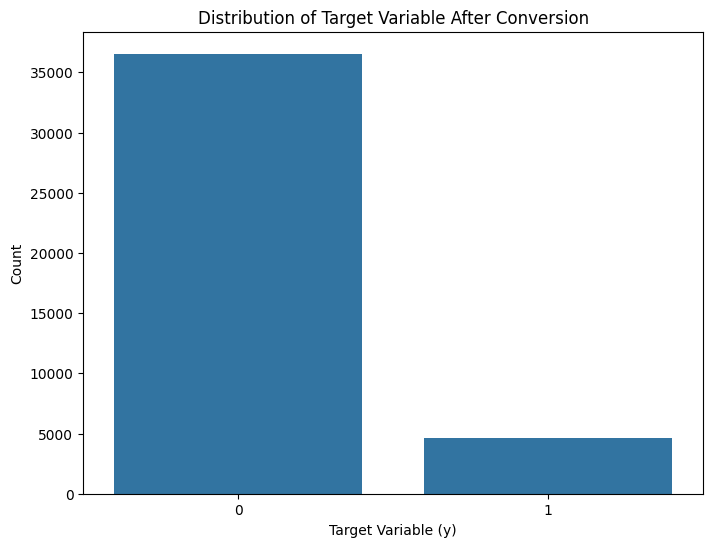

In [ ]:
def parse_y(x):
    if isinstance(x, str):
        x = x.strip().replace('"', '').lower()
        if x == 'no':
            return 0
        elif x == 'yes':
            return 1
    return x
df['y'] = df['y'].apply(parse_y)
df['y'] = df['y'].astype(int)
# Kiểm tra lại phân phối sau khi chuyển đổi
print("Distribution of target variable (y) after conversion:")
print(df['y'].value_counts())
# Vẽ biểu đồ phân phối sau khi chuyển đổi
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable After Conversion')
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Chuẩn hoá và chia tập dữ liệu
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()
train_x, test_x, train_y, test_y = train_test_split(df.iloc[:,:-1],
                                                   df['y'],
                                                   test_size=0.3)
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

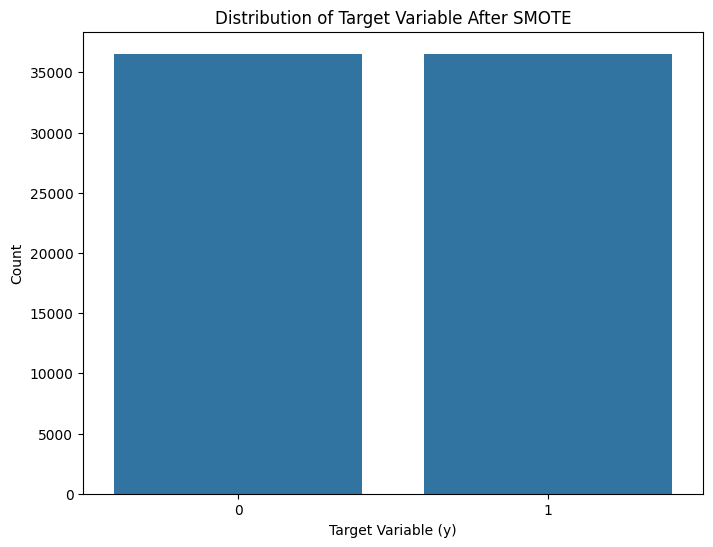

Distribution of target variable (y) after SMOTE:
y
0    36548
1    36548
Name: count, dtype: int64


In [ ]:
# Cân bằng dữ liệu
from imblearn.over_sampling import SMOTE
# Chia dữ liệu thành X và y
X = df.drop(columns='y')
y = df['y']
# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
# Kiểm tra lại phân phối sau khi cân bằng
plt.figure(figsize=(8, 6))
sns.countplot(x=y_res)
plt.title('Distribution of Target Variable After SMOTE')
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')
plt.show()
# Kiểm tra lại phân phối sau khi cân bằng
print("Distribution of target variable (y) after SMOTE:")
print(y_res.value_counts())

# Đào tạo và đánh giá mô hình máy

**1. AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Thiết lập tham số để tinh chỉnh
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Tinh chỉnh AdaBoost
ada = AdaBoostClassifier(random_state=42)
grid_ada = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy')
grid_ada.fit(train_x, train_y)

# Dự đoán và đánh giá
ada_pred = grid_ada.predict(test_x)
print("AdaBoost Best Params:", grid_ada.best_params_)
print("AdaBoost Accuracy:", accuracy_score(test_y, ada_pred))
print("AdaBoost Classification Report:\n", classification_report(test_y, ada_pred))

AdaBoost Best Params: {'learning_rate': 1, 'n_estimators': 50}
AdaBoost Accuracy: 0.9106579266812334
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10989
           1       0.66      0.41      0.50      1368

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



*   Mô hình AdaBoost có kết quả tương tự như Logistic Regression, hoạt động tốt với lớp 0 (không gửi tiền) nhưng còn yếu khi dự đoán lớp 1 (gửi tiền), với recall chỉ đạt 0.41 và F1-score là 0.50.
*   Mô hình này cũng cho thấy khả năng phân loại khách hàng không gửi tiền tốt hơn là phân loại khách hàng gửi tiền.
*   Để cải thiện mô hình, cần thử nghiệm thêm với các tham số khác hoặc kết hợp với các mô hình khác để tăng khả năng dự đoán chính xác cho lớp 1.

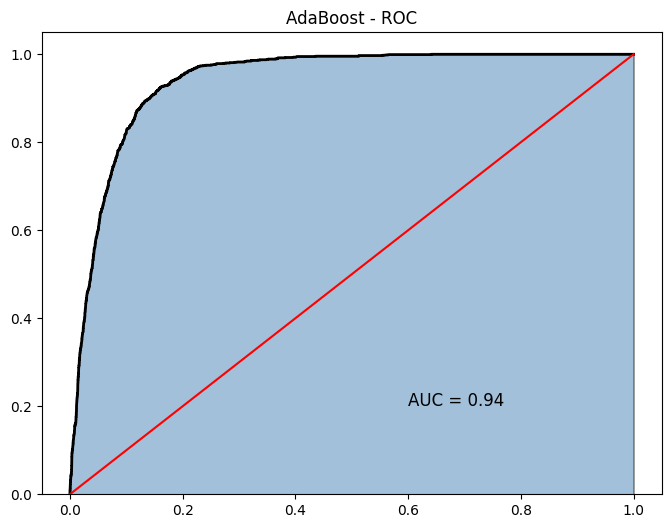

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Dự đoán xác suất
ada_proba = grid_ada.predict_proba(test_x)[:, 1]
# Tính toán đường cong ROC và AUC
fpr1, tpr1, thresholds1 = roc_curve(test_y, ada_proba)
roc_auc = auc(fpr1, tpr1)
# Vẽ biểu đồ ROC
plt.figure(figsize=(8, 6))
plt.stackplot(fpr1, tpr1, color='steelblue', alpha=0.5, edgecolor='black')
plt.plot(fpr1, tpr1, linewidth=2, color='black', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], ls='-', color='red')
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12)
plt.title('AdaBoost - ROC')
plt.show()

**2. Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Thiết lập tham số để tinh chỉnh
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
# Tinh chỉnh Logistic Regression
log_reg = LogisticRegression(random_state=42)
grid_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_log_reg.fit(train_x, train_y)
# Dự đoán và đánh giá
log_pred = grid_log_reg.predict(test_x)
print("Logistic Regression Best Params:", grid_log_reg.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(test_y, log_pred))
print("Logistic Regression Classification Report:\n", classification_report(test_y, log_pred))

Logistic Regression Best Params: {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.9101723719349356
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10989
           1       0.65      0.40      0.50      1368

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



*   Mô hình Logistic Regression hoạt động khá tốt với lớp 0 (không gửi tiền) nhưng vẫn còn yếu khi dự đoán lớp 1 (gửi tiền), với recall chỉ đạt 0.40 và F1-score là 0.50.
*   Mô hình có khả năng phân loại khách hàng không gửi tiền tốt hơn là phân loại khách hàng gửi tiền.
*   Cần cải thiện mô hình để tăng khả năng dự đoán chính xác lớp 1, có thể xem xét các mô hình khác hoặc tinh chỉnh thêm các tham số để đạt kết quả tốt hơn.

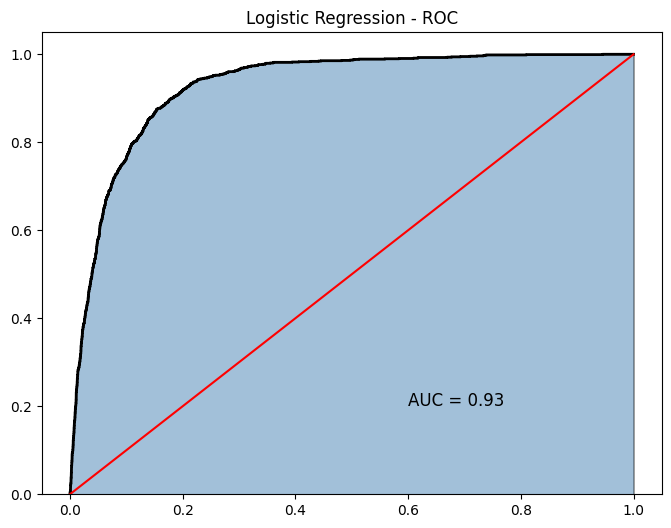

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Dự đoán xác suất
log_proba = grid_log_reg.predict_proba(test_x)[:, 1]

# Tính toán đường cong ROC và AUC
fpr, tpr, thresholds = roc_curve(test_y, log_proba)
roc_auc = roc_auc_score(test_y, log_proba)

# Vẽ biểu đồ ROC
plt.figure(figsize=(8, 6))
plt.stackplot(fpr, tpr, color='steelblue', alpha=0.5, edgecolor='black')
plt.plot(fpr, tpr, linewidth=2, color='black', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], ls='-', color='red')
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, color='black')
plt.title('Logistic Regression - ROC')
plt.show()

**3. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Thiết lập tham số để tinh chỉnh
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# Tinh chỉnh Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(train_x, train_y)
# Dự đoán và đánh giá
rf_pred = grid_rf.predict(test_x)
print("Random Forest Best Params:", grid_rf.best_params_)
print("Random Forest Accuracy:", accuracy_score(test_y, rf_pred))
print("Random Forest Classification Report:\n", classification_report(test_y, rf_pred))

Random Forest Best Params: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Accuracy: 0.9207736505624342
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     10989
           1       0.68      0.54      0.60      1368

    accuracy                           0.92     12357
   macro avg       0.81      0.75      0.78     12357
weighted avg       0.91      0.92      0.92     12357



*   Mô hình Random Forest có kết quả tốt nhất trong ba mô hình, với độ chính xác cao nhất là 92%.
*   Mô hình này hoạt động tốt với lớp 0 (không gửi tiền) và cải thiện khả năng dự đoán lớp 1 (gửi tiền) so với Logistic Regression và AdaBoost.
*   Với các tham số đã tinh chỉnh, Random Forest cho thấy khả năng phân loại khách hàng tốt hơn cả, đặc biệt là trong việc phân biệt các trường hợp gửi tiền.
*   Mô hình Random Forest có thể được sử dụng để cải thiện hiệu quả các chiến dịch marketing tương lai của ngân hàng.

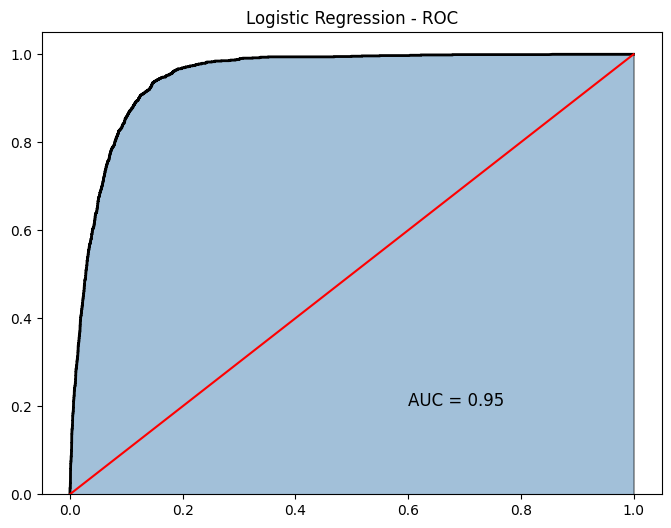

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dự đoán xác suất
rf_proba = grid_rf.predict_proba(test_x)[:, 1]

# Tính toán đường cong ROC và AUC
fpr, tpr, thresholds = roc_curve(test_y, rf_proba)
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ ROC
plt.figure(figsize=(8, 6))
plt.stackplot(fpr, tpr, color='steelblue', alpha=0.5, edgecolor='black')
plt.plot(fpr, tpr, linewidth=2, color='black', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], ls='-', color='red')
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, color='black')
plt.title('Logistic Regression - ROC')
plt.show()